In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("loan_prediction[1].csv")

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
data.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
474,LP002524,Male,No,2,Graduate,No,5532,4648.0,162.0,360.0,1.0,Rural,Y


In [324]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [325]:
data.shape

(614, 13)

In [326]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [327]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [331]:
data.Gender = data.Gender.fillna('Male')

In [8]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [341]:
data.Married = data.Married.fillna('Yes')

In [9]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [333]:
data.Dependents = data.Dependents.fillna('0')

In [10]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [334]:
data.Self_Employed = data.Self_Employed.fillna('No')

In [336]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())

In [337]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [338]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)

In [11]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [339]:
data.Credit_History = data.Credit_History.fillna(1.0)

In [342]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Univariant Analysis

<Axes: >

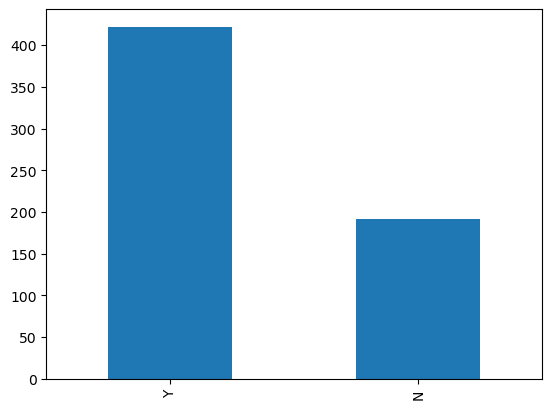

In [12]:
data['Loan_Status'].value_counts().plot.bar()      

<Axes: >

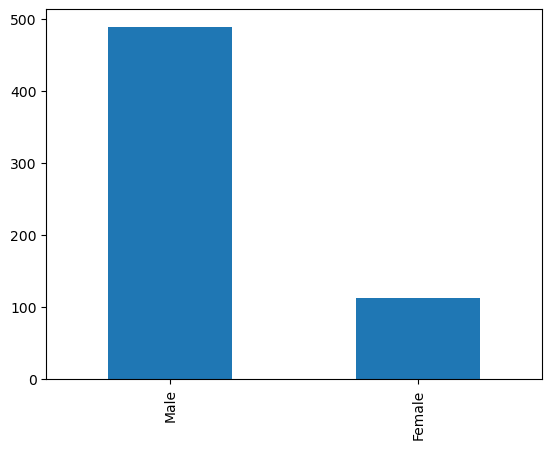

In [14]:
data['Gender'].value_counts().plot.bar()      

<Axes: >

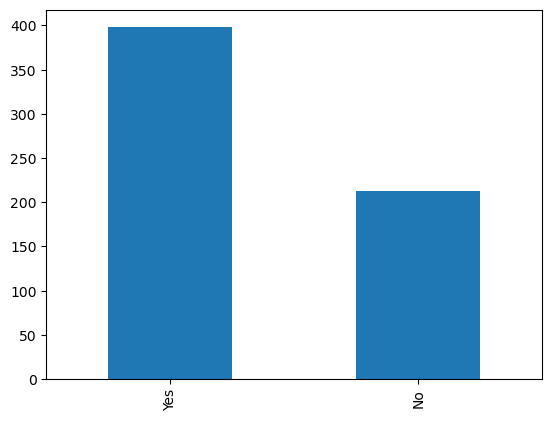

In [16]:
data['Married'].value_counts().plot.bar()      

<Axes: >

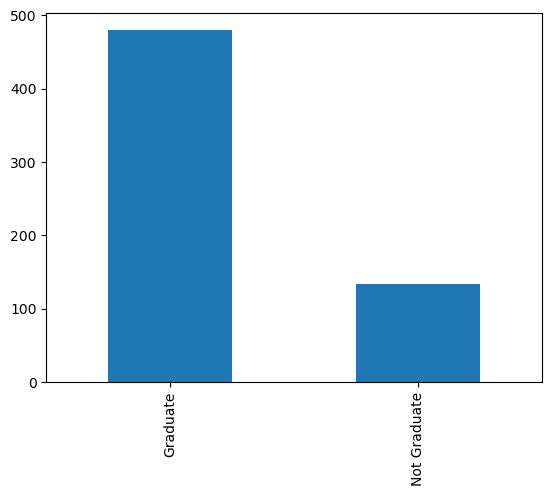

In [17]:
data['Education'].value_counts().plot.bar()      

<Axes: >

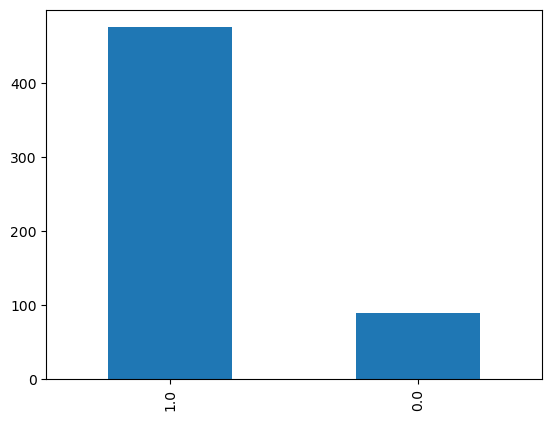

In [19]:
data['Credit_History'].value_counts().plot.bar()      

<Axes: >

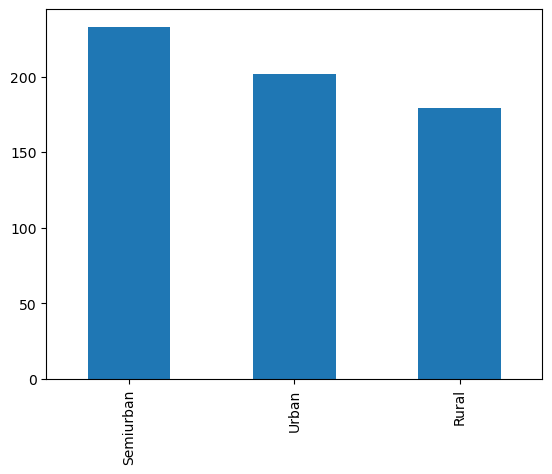

In [20]:
data['Property_Area'].value_counts().plot.bar()      

<Axes: >

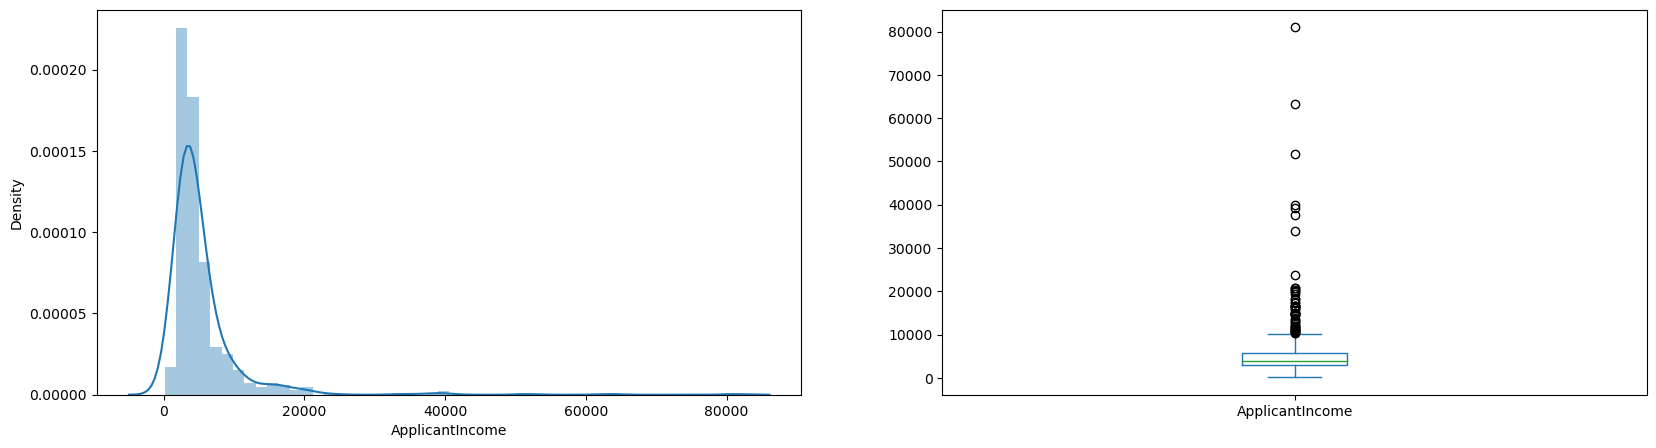

In [21]:
plt.subplot(121)
sns.distplot(data['ApplicantIncome'])
plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(20,5))

Text(0.5, 0.98, '')

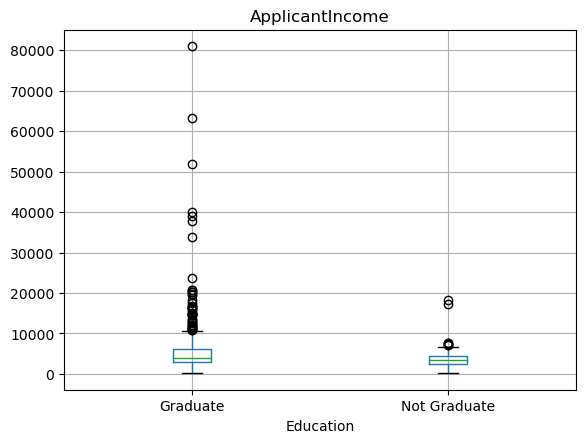

In [22]:
data.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

# Bivariant Analysis

In [23]:
Gender=pd.crosstab(data['Gender'],data['Loan_Status']) 
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<Axes: xlabel='Gender'>

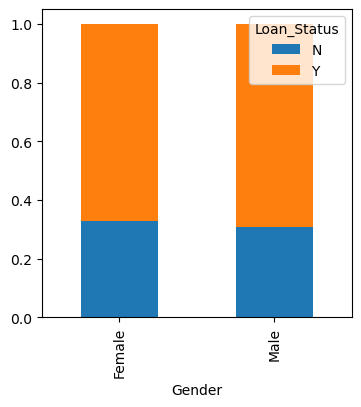

In [24]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [25]:
Education= pd.crosstab(data['Education'],data['Loan_Status'])
Education


Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


<Axes: xlabel='Education'>

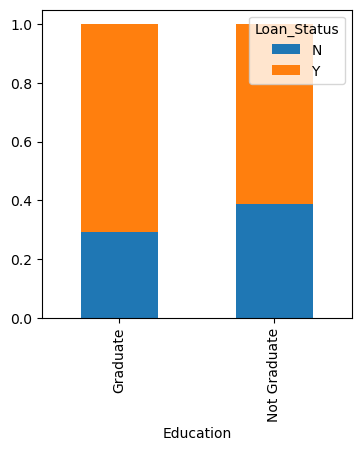

In [26]:
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4) )

In [27]:
Self_Employed= pd.crosstab(data['Self_Employed'],data['Loan_Status'])
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


<Axes: xlabel='Self_Employed'>

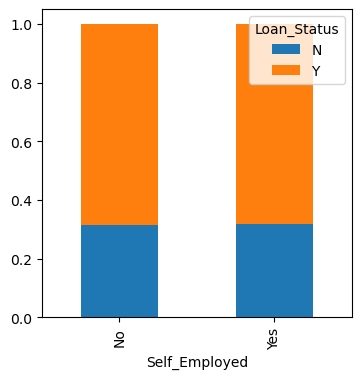

In [28]:
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

In [29]:
Credit_History= pd.crosstab(data['Credit_History'],data['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


<Axes: xlabel='Credit_History'>

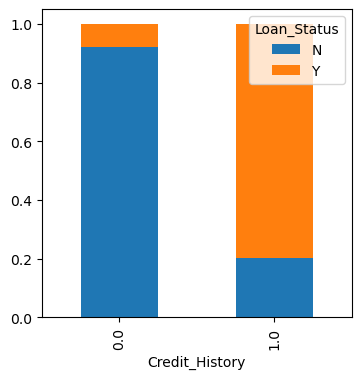

In [30]:
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

In [344]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in data.columns:
    
    if data[i].dtypes == "object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


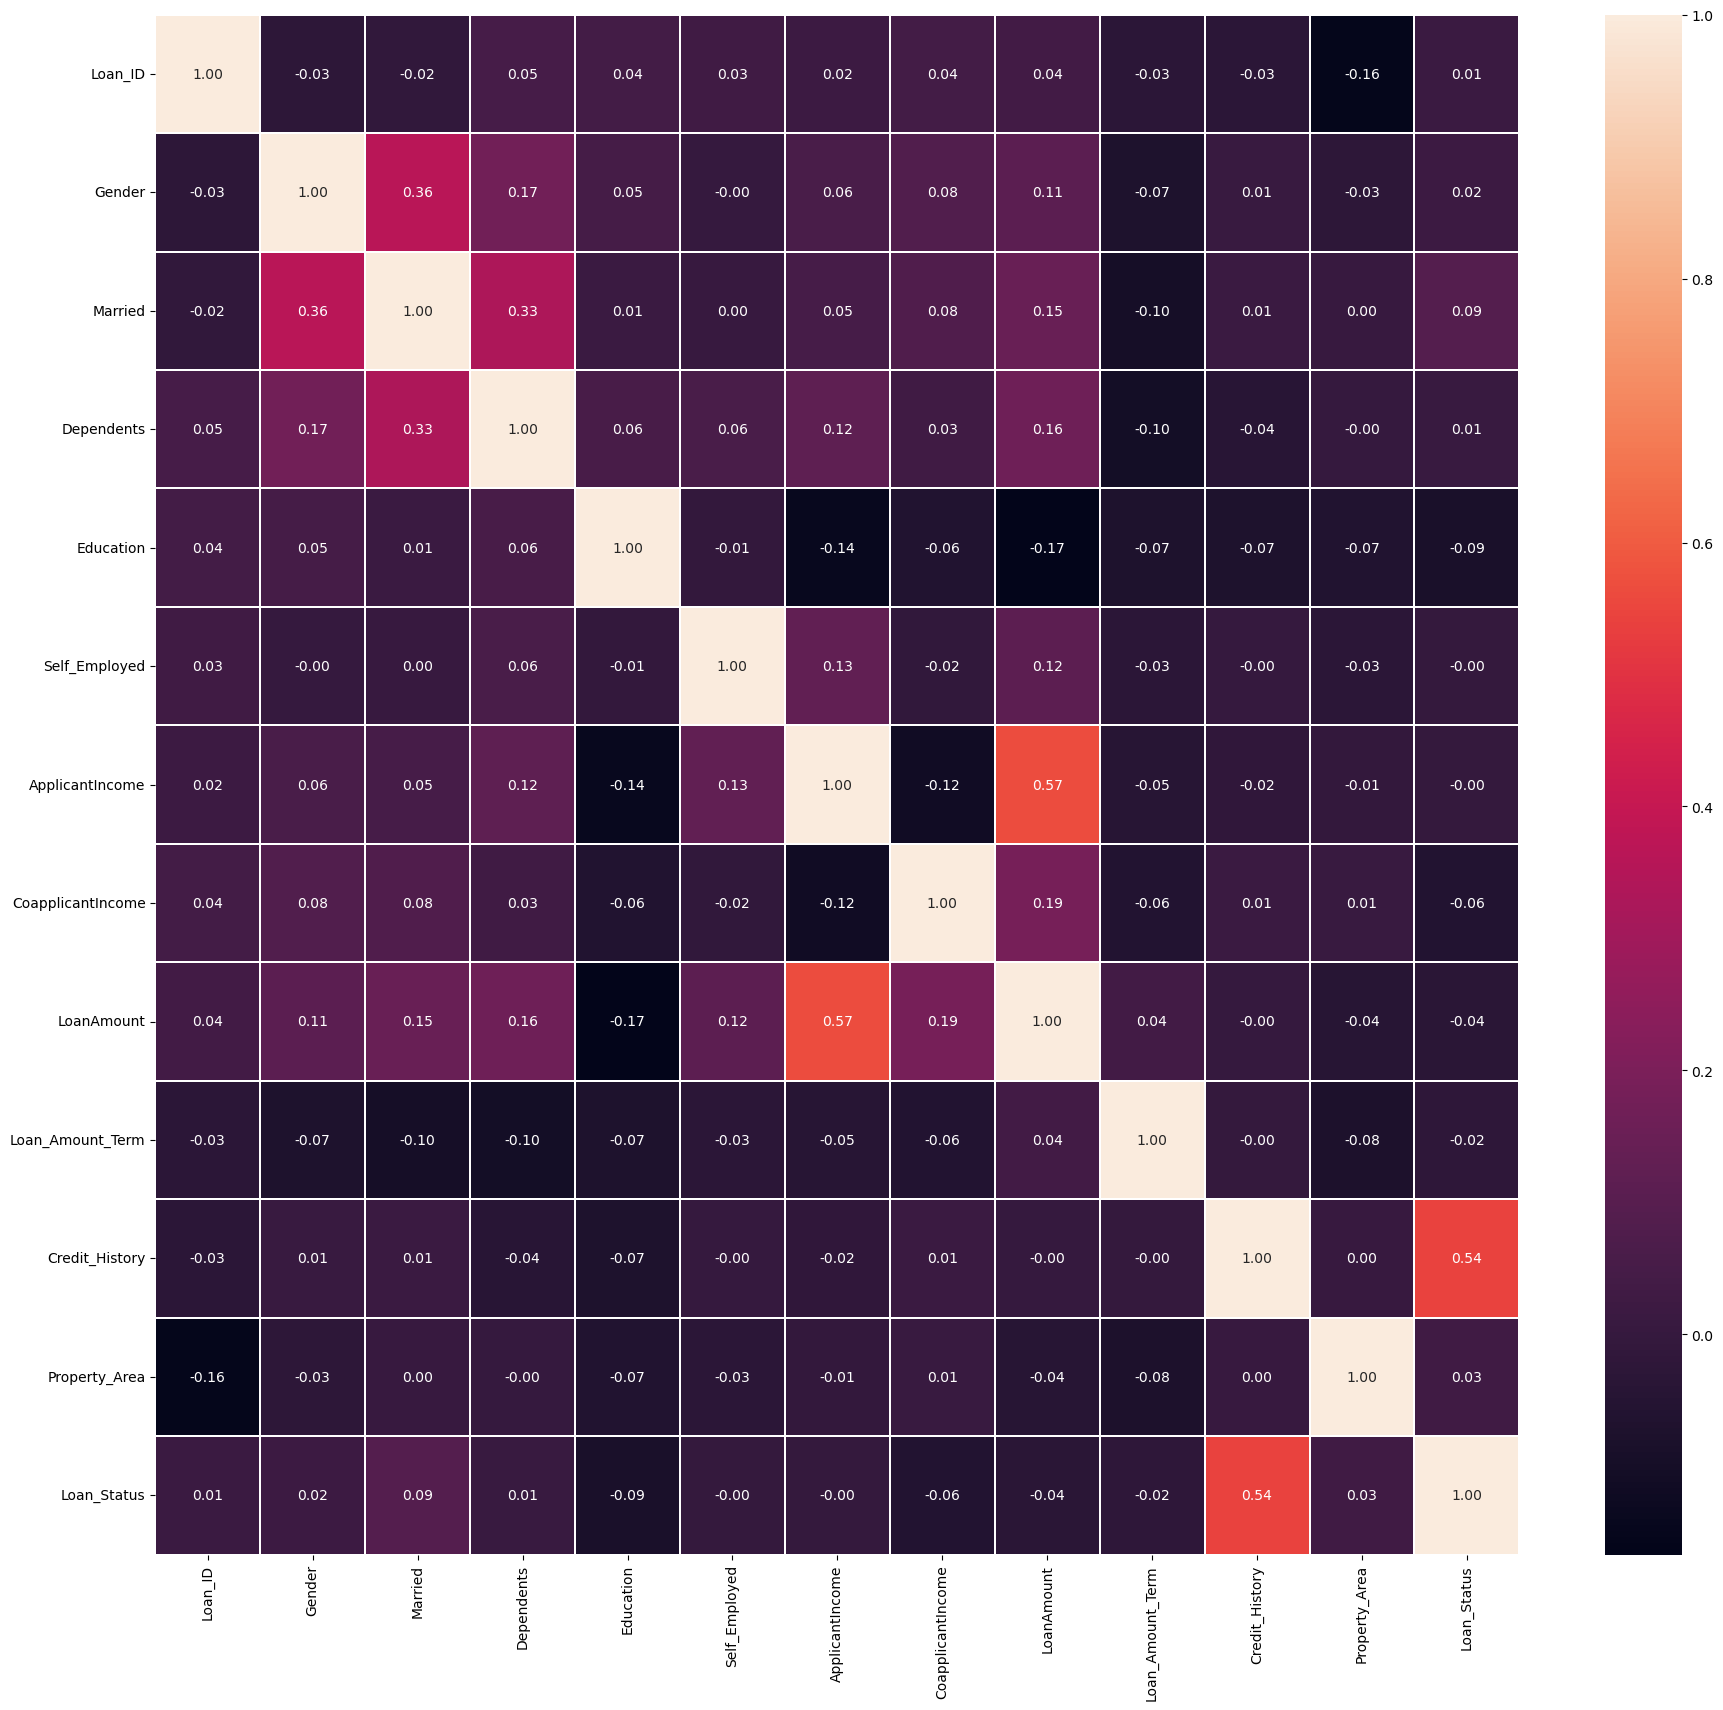

In [345]:
corr_matrix_hmap=data.corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix_hmap,annot=True,linewidths=0.1,fmt='0.2f')
plt.show()



In [346]:
corr_matrix_hmap['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Loan_ID              0.011773
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

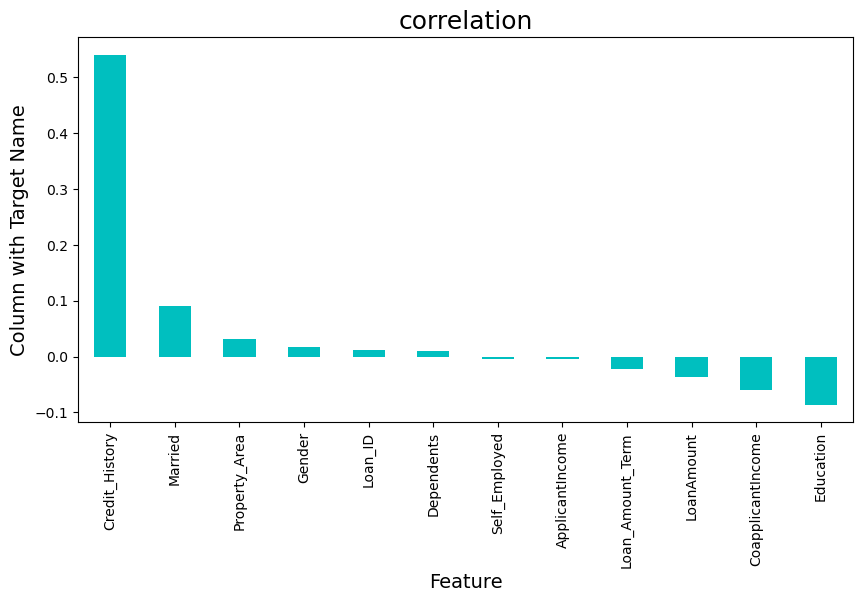

In [348]:
plt.figure(figsize=(10,5))
data.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target Name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()



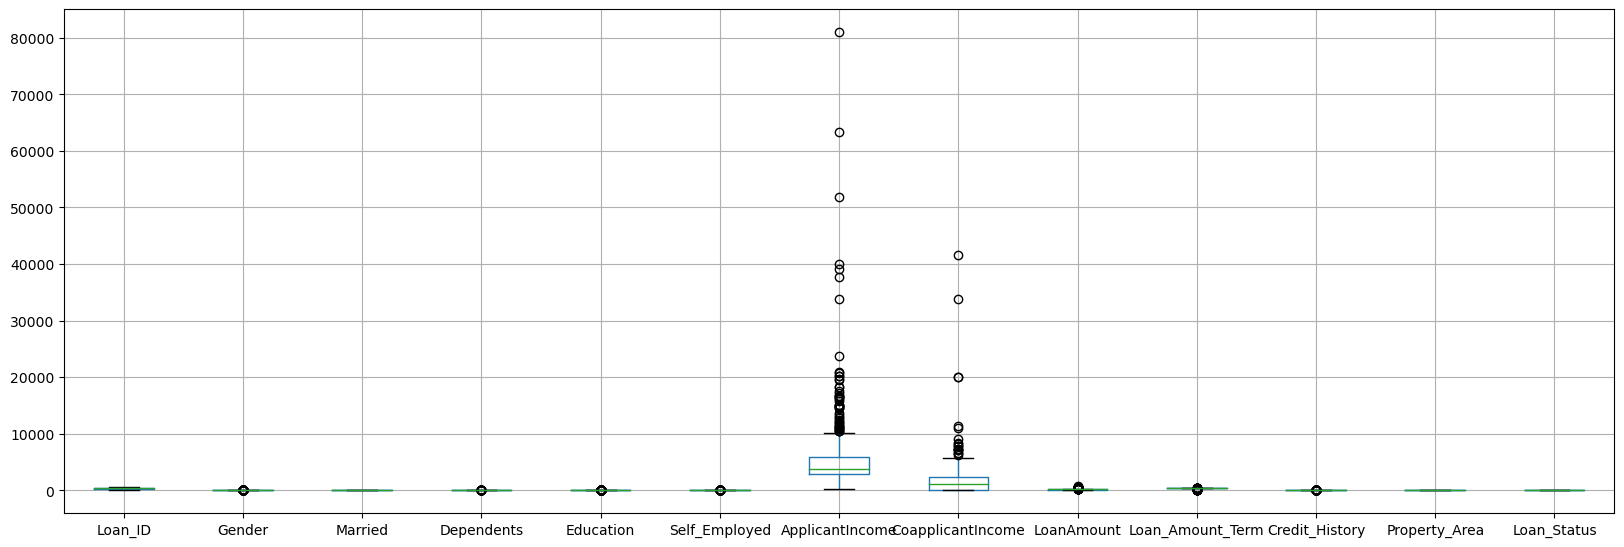

In [349]:
#checking for outliers
data.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()



In [350]:
# Removing Outliers
from scipy.stats import zscore
z= np.abs(zscore(data))

threshold = 3
print(np.where(z< 3))

data_new = data[(z< 3).all(axis=1)]

data.shape

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))


(614, 13)

In [351]:
data_new.shape

(577, 13)

In [352]:
x = data.iloc[:,0:-1]
x.head()

y = data.iloc[:,-1]
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

In [353]:
x.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

In [354]:
from sklearn.preprocessing import power_transform
z = power_transform(x[0:])
data_new= pd.DataFrame(z,columns=x.columns)

x = data_new


x.skew()

Loan_ID             -0.287022
Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.392571
Credit_History      -2.021971
Property_Area       -0.158267
dtype: float64

In [355]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

1.0    422
0.0    192
Name: Loan_Status, dtype: int64


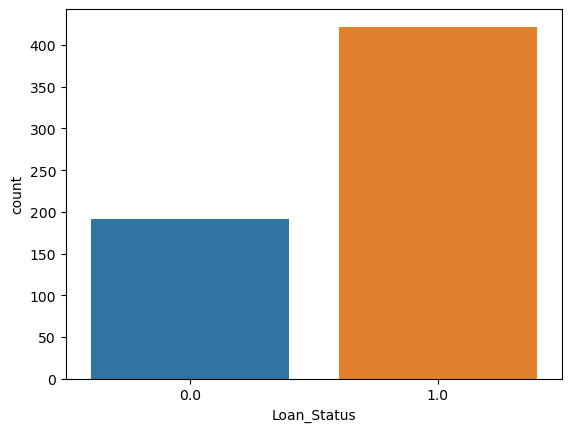

In [356]:
import seaborn as sns
alpha = sns.countplot(x='Loan_Status',data=data)
print(data['Loan_Status'].value_counts())

In [357]:
df_visual= x[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
'Loan_Amount_Term', 'Credit_History']].copy()

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

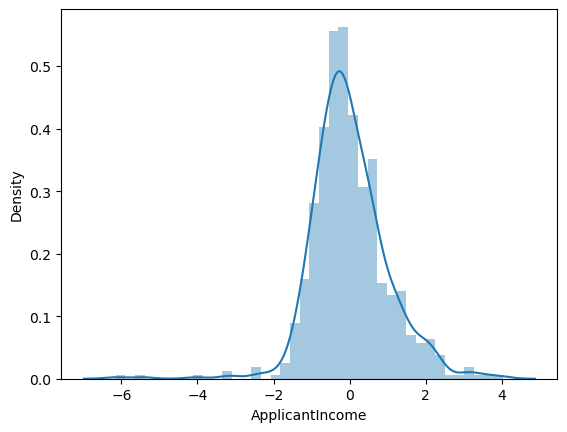

In [358]:
import seaborn as sns
sns.distplot(df_visual['ApplicantIncome'],kde=True)

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

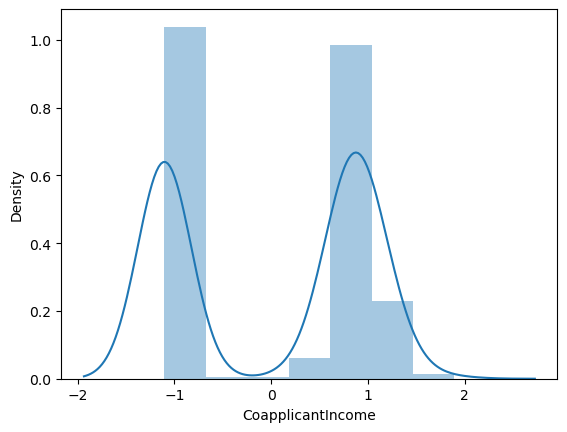

In [359]:
sns.distplot(df_visual['CoapplicantIncome'],kde=True)

<Axes: xlabel='Credit_History', ylabel='Density'>

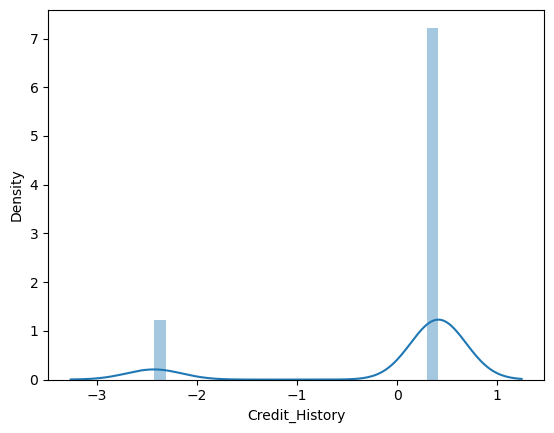

In [360]:
sns.distplot(df_visual['Credit_History'],kde=True)

In [362]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

x=mms.fit_transform(x)

# Logistic Regression

In [363]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 42)

from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

lm.fit(x_train,y_train)

lm.score(x_train,y_train)



0.8150851581508516

In [364]:
pred=lm.predict(x_test)
print('Predicted',pred)
print('Actual',y_test)



Predicted [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1.]
Actual 350    1.0
377    1.0
163    1.0
609    1.0
132    1.0
      ... 
280    0.0
195    0.0
613    0.0
495    1.0
451    1.0
Name: Loan_Status, Length: 203, dtype: float64


In [365]:
print('Accuracy Score:',accuracy_score(y_test,pred))



Accuracy Score: 0.7980295566502463


In [367]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc =accuracy_score(y_test,predrf)
if acc > maxAccu:
    
    maxAccu = acc
    maxRS = i

print("Best score is: ",maxAccu,"on Random_state",maxRS)

Best score is:  0.7881773399014779 on Random_state 199


In [368]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 12)
LR = LogisticRegression()
LR.fit(x_train,y_train)
predrf = LR.predict(x_test)

In [369]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
print('Accuracy Score:', accuracy_score(y_test,predrf))
print('Confusion Matrix:', confusion_matrix(y_test,predrf))
print('Classification Report:', classification_report(y_test,predrf))



Accuracy Score: 0.7931034482758621
Confusion Matrix: [[ 29  36]
 [  6 132]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.83      0.45      0.58        65
         1.0       0.79      0.96      0.86       138

    accuracy                           0.79       203
   macro avg       0.81      0.70      0.72       203
weighted avg       0.80      0.79      0.77       203



# Decision Tree Classifier

In [371]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,preddt))
print('Confusion Matrix:', confusion_matrix(y_test,preddt))
print('Classification Report:', classification_report(y_test,preddt))

Accuracy Score: 0.7093596059113301
Confusion Matrix: [[ 38  27]
 [ 32 106]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.54      0.58      0.56        65
         1.0       0.80      0.77      0.78       138

    accuracy                           0.71       203
   macro avg       0.67      0.68      0.67       203
weighted avg       0.72      0.71      0.71       203



# Cross Validation

In [372]:
pred_train = LR.predict(x_train)
pred_test =LR.predict(x_test)
Train_accuracy = accuracy_score(y_train,pred_train)
Test_accuracy = accuracy_score(y_test,pred_test)
maxAccu=0
maxRS=0

from sklearn.model_selection import cross_val_score
for j in range(2,16):
    
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean = cv_score.mean()
if cv_mean > maxAccu:
    
    maxAccu = cv_mean
    maxRS = j
print(f'At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}')

print('\n')

At cross fold 15 cv score is 0.8094715447154471 and accuracy score training is 0.8175182481751825 and accuracy for the testing is 0.7931034482758621




In [373]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(LR,x,y,cv=j)
cv_mean = cv_score.mean()
print('Cross validation score for Logistic Regression',cv_mean)

Cross validation score for Logistic Regression 0.8094715447154471


In [374]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=j)
cv_mean = cv_score.mean()
print('Cross validation score for Decision Tree',cv_mean)

Cross validation score for Decision Tree 0.6689430894308944


In [375]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
EN=ElasticNet()
clf=GridSearchCV(EN,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [376]:
EN = ElasticNet(alpha=0.01,random_state=0)
EN.fit(x_train,y_train)
EN.score(x_train,y_train)
pred_EN=EN.predict(x_test)

lss= accuracy_score(y_test,pred_test)
lss

0.7931034482758621

In [377]:
cross_validation_score = cross_val_score(EN,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.28786830000001484

In [378]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(2,15),'criterion':['gini','entrophy']}

rf = DecisionTreeClassifier()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'gini', 'max_depth': 2}


In [380]:
rf=DecisionTreeClassifier(criterion='gini',max_depth=2)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()

print('Cross Validation Score:',rfc*100)

#print(clf.best_params_)

Accuracy Score: 78.32512315270937
Cross Validation Score: 80.62108489937359


# Save The Model

In [381]:
import pickle
filename = 'Loan_Prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

In [382]:
loaded_model=pickle.load(open('Loan_Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.7832512315270936


In [383]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,201,202
Predicted,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Original,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
